In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [6]:
class PyTorchSimpleNN(nn.Module):
    def __init__(self, init_mode):
        super().__init__()
        self.fc1 = nn.Linear(784, 300)
        self.fc2 = nn.Linear(300, 10)
        if init_mode == 'zeros':
            nn.init.zeros_(self.fc1.weight)
            nn.init.zeros_(self.fc1.bias)
            nn.init.zeros_(self.fc2.weight)
            nn.init.zeros_(self.fc2.bias)
        elif init_mode == 'random':
            nn.init.uniform_(self.fc1.weight, -1, 1)
            nn.init.uniform_(self.fc1.bias, -1, 1)
            nn.init.uniform_(self.fc2.weight, -1, 1)
            nn.init.uniform_(self.fc2.bias, -1, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

In [11]:
# Transformation for MNIST data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Data loader
train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)

# Model, loss function, and optimizer
model = PyTorchSimpleNN(init_mode='random')
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.5)

# Train the model
train_losses = []
for epoch in range(10):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss:.4f}')


Epoch 1, Loss: 0.6906
Epoch 2, Loss: 0.2898
Epoch 3, Loss: 0.2242
Epoch 4, Loss: 0.1867
Epoch 5, Loss: 0.1617
Epoch 6, Loss: 0.1429
Epoch 7, Loss: 0.1281
Epoch 8, Loss: 0.1174
Epoch 9, Loss: 0.1072
Epoch 10, Loss: 0.0983


Accuracy: 95.51%
Number Misclassified: 449


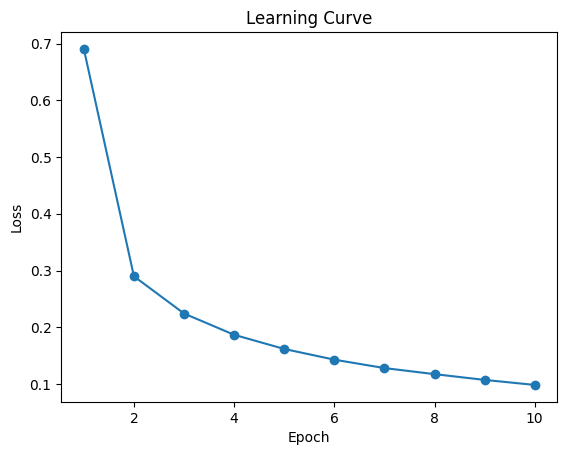

In [12]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}%')
print(f'Number Misclassified: ' + str(total-correct))

# Plot learning curve
plt.plot(range(1, 11), train_losses, marker='o', linestyle='-')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()